In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
nfl_data = pd.read_csv("../data/historic_nfl_elo.csv").set_index("Unnamed: 0")

In [3]:
nfl_data.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2'],
      dtype='object')

In [4]:
nfl_records = nfl_data[nfl_data['playoff'].isna()]

In [5]:
elo_data = nfl_records[['elo1_pre','elo1_post','score1','score2']]

In [6]:
elo_data.isnull().values.any()

False

In [7]:
elo_data['diff_in_elo']= elo_data['elo1_post']- elo_data['elo1_pre']

/home/tani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
elo_data['diff_in_score']= elo_data['score1']- elo_data['score2']

/home/tani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
elo_data

,elo1_pre,elo1_post,score1,score2,diff_in_elo,diff_in_score
Unnamed: 0,,,,,,
0,1503.947000,1516.108000,48.0,0.0,12.161000,48.0
1,1493.002000,1515.434000,14.0,0.0,22.432000,14.0
2,1516.108000,1542.135000,45.0,0.0,26.027000,45.0
3,1368.333000,1386.533000,20.0,0.0,18.200000,20.0
4,1504.688000,1516.803000,48.0,0.0,12.115000,48.0
...,...,...,...,...,...,...
16525,1584.215388,1542.091595,14.0,35.0,-42.123793,-21.0
16526,1560.932476,1569.851069,31.0,24.0,8.918593,7.0
16527,1487.042014,1490.985092,16.0,15.0,3.943078,1.0


In [10]:
# Creating a column depending on which team wins or loses
elo_data['Status'] = np.where(elo_data['diff_in_score']>0, 'winner', 'loser')

/home/tani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
elo_data.head()

,elo1_pre,elo1_post,score1,score2,diff_in_elo,diff_in_score,Status
Unnamed: 0,,,,,,,
0,1503.947,1516.108,48.0,0.0,12.161,48.0,winner
1,1493.002,1515.434,14.0,0.0,22.432,14.0,winner
2,1516.108,1542.135,45.0,0.0,26.027,45.0,winner
3,1368.333,1386.533,20.0,0.0,18.200,20.0,winner
4,1504.688,1516.803,48.0,0.0,12.115,48.0,winner


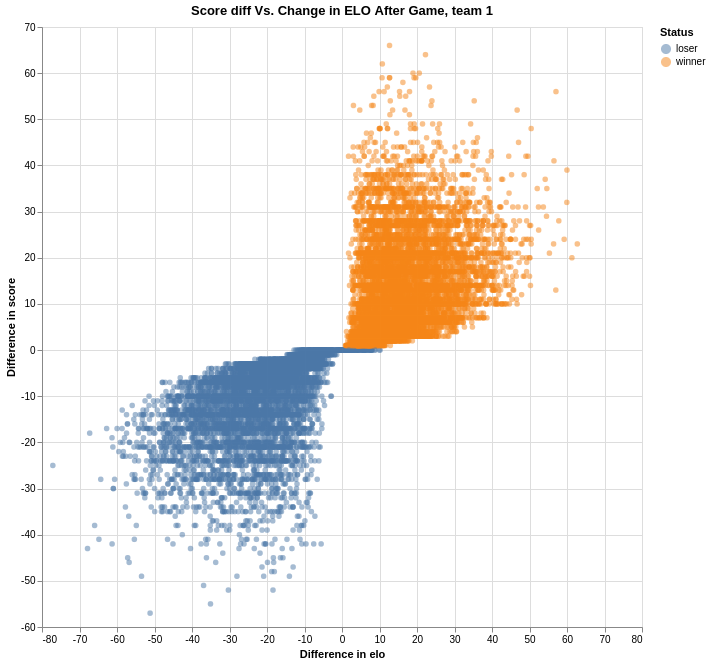

In [15]:
alt.data_transformers.disable_max_rows()

chart = alt.Chart(elo_data).mark_circle(opacity = 0.5).encode(
        alt.X('diff_in_elo:Q', title = 'Difference in elo'),
        alt.Y('diff_in_score:Q', title = 'Difference in score'),
        alt.Color('Status')).properties(
            title = 'Score diff Vs. Change in ELO After Game, team 1',
            height = 600,
            width = 600)

chart

In [17]:
chart.save('../img/change_of_elo_with_score.html')